In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import camera

In [3]:
# Loading data

# Images
im1 = np.array(Image.open('images/001.jpg'))
im2 = np.array(Image.open('images/002.jpg'))

# 2D points for each view
points2D = [np.loadtxt('2D/00'+str(i+1)+'.corners').T for i in range(3)]

# 3D points
points3D = np.loadtxt('3D/p3d').T

# Correspondences
corr = np.genfromtxt('2D/nview-corners',dtype='int',missing_values='*') # Book uses outdated command

# Cameras
P = [camera.Camera(np.loadtxt('2D/00'+str(i+1)+'.P')) for i in range(3)]

In [4]:
# Make 3D points homogeneous and project
X = np.vstack((points3D,np.ones(points3D.shape[1])))
x = P[0].project(X)

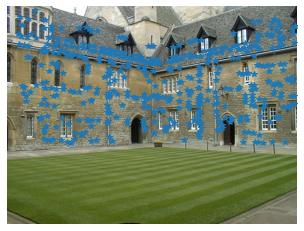

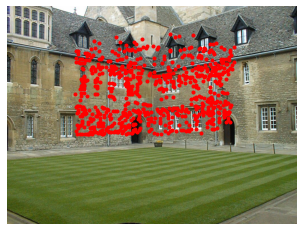

In [5]:
# Plotting points in view 1: 2D points and projected 3D points

plt.figure()
plt.imshow(im1)
plt.plot(points2D[0][0],points2D[0][1],'*')
plt.axis('off')

plt.figure()
plt.imshow(im1)
plt.plot(x[0],x[1],'r.')
plt.axis('off')

plt.show()

In [6]:
# 3D plotting library
from mpl_toolkits.mplot3d import axes3d

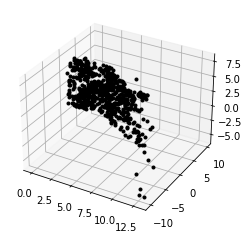

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d') # Set 3D axes
ax.plot(points3D[0],points3D[1],points3D[2],'k.')

In [8]:
import sfm

In [9]:
# Index for points in first two views
ndx = (corr[:,0]>=0) & (corr[:,1]>=1)


# get coordinates and make homogeneous
x1 = points2D[0][:,corr[ndx,0]]
x1 = np.vstack( (x1,np.ones(x1.shape[1])) )
x2 = points2D[1][:,corr[ndx,1]]
x2 = np.vstack( (x2,np.ones(x2.shape[1])) )

# compute F
F = sfm.compute_fundamental(x1,x2)

# compute the epipole
e = sfm.compute_epipole(F)

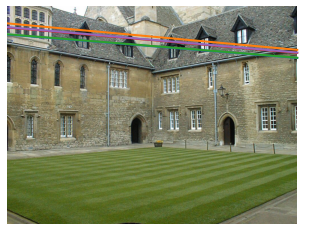

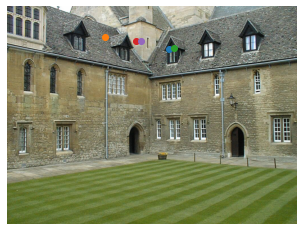

In [10]:
plt.figure()
plt.imshow(im1)

# Plot each line individually
for i in range(5):
    sfm.plot_epipolar_line(im1,F,x2[:,i],e,False)
plt.axis('off')

plt.figure()
plt.imshow(im2)

# Plot each line individually
for i in range(5):
    plt.plot(x2[0,i],x2[1,i],'o')
plt.axis('off')

plt.show()

In [11]:
# Triangulation of points in view 1

# Index for points in first two views
ndx = (corr[:,0]>=0) & (corr[:,1]>=0)

# Get coordinates and make homogeneous
x1 = points2D[0][:,corr[ndx,0]]
x1 = np.vstack((x1,np.ones(x1.shape[1])))
x2 = points2D[1][:,corr[ndx,1]]
x2 = np.vstack((x2,np.ones(x2.shape[1])))

Xtrue = points3D[:,np.where(ndx)[0]]
Xtrue = np.vstack((Xtrue,np.ones(Xtrue.shape[1])))

# Check First three points
Xest = sfm.triangulate(x1,x2,P[0].P,P[1].P)
print(Xest[:,:3])
print(Xtrue[:,:3])

[[10.82952242 10.67393108 10.79101689]
 [ 4.63102238 -5.39290173  3.20016145]
 [-6.38377908 -5.95501313 -6.27356435]
 [ 1.          1.          1.        ]]
[[ 3.7585792   1.0378863   1.5606923 ]
 [-0.44845037 -0.54627892 -0.5211711 ]
 [ 4.4300374   3.4601538   3.4636809 ]
 [ 1.          1.          1.        ]]


In [12]:
# Computation of P from correspondence

corr = corr[:,0]
ndx3D = np.where(corr>=0)[0] # missing values are -1
ndx2D = corr[ndx3D]

# Select visible points and make homogeneous
x = points2D[0][:,ndx2D] # View 1
x = np.vstack((x,np.ones(x.shape[1])))
X = points3D[:,ndx3D]
X = np.vstack((X,np.ones(X.shape[1])))

# Estimate P
Pest = camera.Camera(sfm.compute_P(x,X))

# Comparison
print(Pest.P/Pest.P[2,3])
print(P[0].P/P[0].P[2,3])

[[-5.68022636e+01 -3.35033034e+01 -3.95629356e+01  4.38844431e+02]
 [-3.02217669e+01 -1.81010469e+01 -2.14274821e+01  2.31045786e+02]
 [-1.28141674e-01 -8.03617676e-02 -9.04493849e-02  1.00000000e+00]]
[[ 1.12098950e+00 -3.55944088e+01  1.52547788e+01  5.17509985e+02]
 [-3.52549812e+01 -9.50215846e+00 -9.38429476e+00  4.46793343e+02]
 [ 2.24355670e-03 -2.18433681e-02 -2.18131079e-02  1.00000000e+00]]


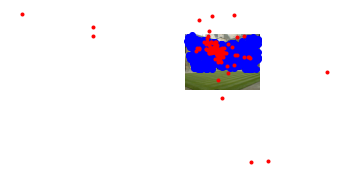

In [13]:
# Projecting to the image

xest = Pest.project(X)

# Plotting
plt.figure()
plt.imshow(im1)
plt.plot(x[0],x[1],'bo')
plt.plot(xest[0],xest[1],'r.')
plt.axis('off')

plt.show()